# Compare different surrogate models
David Eriksson <dme65@cornell.edu>

In [1]:
from pySOT.surrogate import LinearTail, CubicKernel, TPSKernel, \
    GPRegressor, PolyRegressor, RBFInterpolant
import numpy as np
import matplotlib.pylab as plt
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 

In [2]:
def f(x):
    xx = x / 100
    return (6 * xx - 2) ** 2 * np.sin(12 * xx - 4)

## Train the different models on 5 points

In [3]:
x = 100 * np.expand_dims(np.array([0.0, 0.25, 0.6, 0.75, 1.0]), axis=1)  # Make 5 x 1
xx = 100 * np.expand_dims(np.linspace(start=0.0, stop=1.0, num=100), axis=1)
lb, ub = np.zeros(1), 100 * np.ones(1)


rbf_cubic = RBFInterpolant(dim=1, lb=lb, ub=ub, kernel=CubicKernel(), tail=LinearTail(dim=1), eta=1e-6)
rbf_cubic.add_points(x, f(x))

rbf_tps = RBFInterpolant(dim=1, lb=lb, ub=ub, kernel=TPSKernel(), tail=LinearTail(dim=1), eta=1e-6)
rbf_tps.add_points(x, f(x))

gp = GPRegressor(dim=1, lb=lb, ub=ub)
gp.add_points(x, f(x))

poly = PolyRegressor(dim=1, lb=lb, ub=ub, degree=3)
poly.add_points(x, f(x))

## Plot the predictions

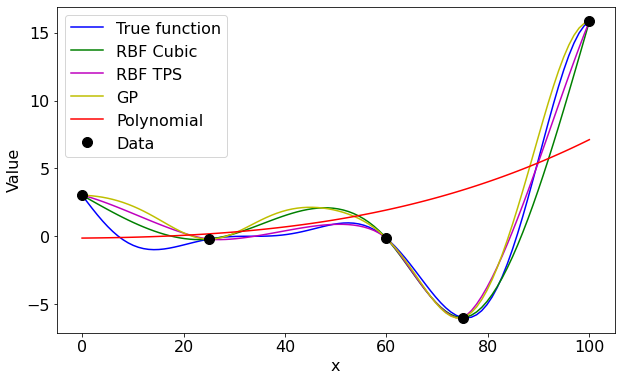

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(xx, f(xx), 'b')
plt.plot(xx, rbf_cubic.predict(xx), 'g')
plt.plot(xx, rbf_tps.predict(xx), 'm')
plt.plot(xx, gp.predict(xx), 'y')
plt.plot(xx, poly.predict(xx), 'r')
plt.plot(x, f(x), 'k.', markersize=20)
plt.legend(("True function", "RBF Cubic", "RBF TPS", 
            "GP", "Polynomial", "Data"), fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.xlabel("x", fontsize=16)
plt.show()

## Print the maximum absolute error

In [5]:
print("RBF Cubic error:\t{:0.2e}".format(np.max(np.abs(f(xx) - rbf_cubic.predict(xx)))))
print("RBF TPS error:\t\t{:0.2e}".format(np.max(np.abs(f(xx) - rbf_tps.predict(xx)))))
print("GP error:\t\t{:0.2e}".format(np.max(np.abs(f(xx) - gp.predict(xx)))))
print("Polynomial error:\t{:0.2e}".format(np.max(np.abs(f(xx) - poly.predict(xx)))))

RBF Cubic error:	2.97e+00
RBF TPS error:		2.34e+00
GP error:		2.88e+00
Polynomial error:	9.57e+00


## Add 35 random points to the models

In [6]:
np.random.seed(0)
x = np.vstack((x, 100 * np.random.rand(35, 1)))

rbf_cubic.add_points(x, f(x))
rbf_tps.add_points(x, f(x))
gp.add_points(x, f(x))
poly.add_points(x, f(x))

## Plot the new predictions training on all 40 points

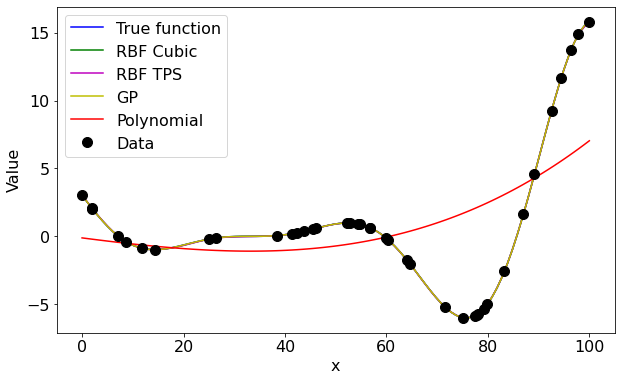

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(xx, f(xx), 'b')
plt.plot(xx, rbf_cubic.predict(xx), 'g')
plt.plot(xx, rbf_tps.predict(xx), 'm')
plt.plot(xx, gp.predict(xx), 'y')
plt.plot(xx, poly.predict(xx), 'r')
plt.plot(x, f(x), 'k.', markersize=20)
plt.legend(("True function", "RBF Cubic", "RBF TPS", 
            "GP", "Polynomial", "Data"), fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.xlabel("x", fontsize=16)
plt.show()

## Print the new maximum absolute error

In [8]:
print("RBF Cubic error:\t{:0.2e}".format(np.max(np.abs(f(xx) - rbf_cubic.predict(xx)))))
print("RBF TPS error:\t\t{:0.2e}".format(np.max(np.abs(f(xx) - rbf_tps.predict(xx)))))
print("GP error:\t\t{:0.2e}".format(np.max(np.abs(f(xx) - gp.predict(xx)))))
print("Polynomial error:\t{:0.2e}".format(np.max(np.abs(f(xx) - poly.predict(xx)))))

RBF Cubic error:	5.90e-02
RBF TPS error:		8.08e-02
GP error:		1.85e-03
Polynomial error:	8.79e+00
